In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('train_agriculture.xlsx')

In [3]:
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
data.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [5]:
data.shape

(4599, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


1. Column Number_Weeks_Used has null values we will treat the null values using Simple Imputer.
2. ID column is of object type, Number_Weeks_Used is of float type else all are of integer data type.

In [7]:
data.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

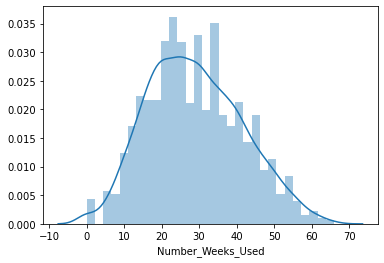

In [8]:
sns.distplot(data['Number_Weeks_Used'])

The data in the column Number_Weeks_Used has a bell shaped curve, data seems to have a normal distribution, so we can replace the null values using mean.

In [9]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')

In [10]:
data['Number_Weeks_Used']=si.fit_transform(data['Number_Weeks_Used'].values.reshape(-1,1))
data

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.000000,0,1,0
1,F00000003,209,1,0,1,0,0.000000,0,2,1
2,F00000004,257,1,0,1,0,0.000000,0,2,1
3,F00000005,257,1,1,1,0,0.000000,0,2,1
4,F00000006,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,28.891027,1,1,1
4595,F00008079,2139,0,1,2,30,47.000000,2,1,1
4596,F00008080,2267,0,1,2,10,7.000000,27,2,0
4597,F00008082,2267,0,1,2,10,20.000000,24,2,0


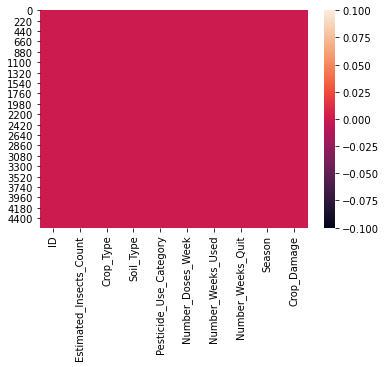

In [11]:
sns.heatmap(data.isnull())

Now there are no null values in the data.

In [12]:
data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observations:
    1. Standard Deviation is very high for the column Estimated_Insects_Count.
    2. Mean is higher than the standard deviation for the columns: Estimated_Insects_Count, Crop_Type, Soil_Type, Pesticide_Use_Category, Number_Doses_Week, Number_Weeks_Quit, Crop_Damage, the data for these columns is right skewed.
    3. For the column, Season median is higher than the mean i.e. the data is left skewed, we will remove the skewness using Power Transformer.
    4. Also the difference between the 75th percentile and the max is higher for Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Quit, the data has outliers which we will treat using zscore.

In [13]:
data.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


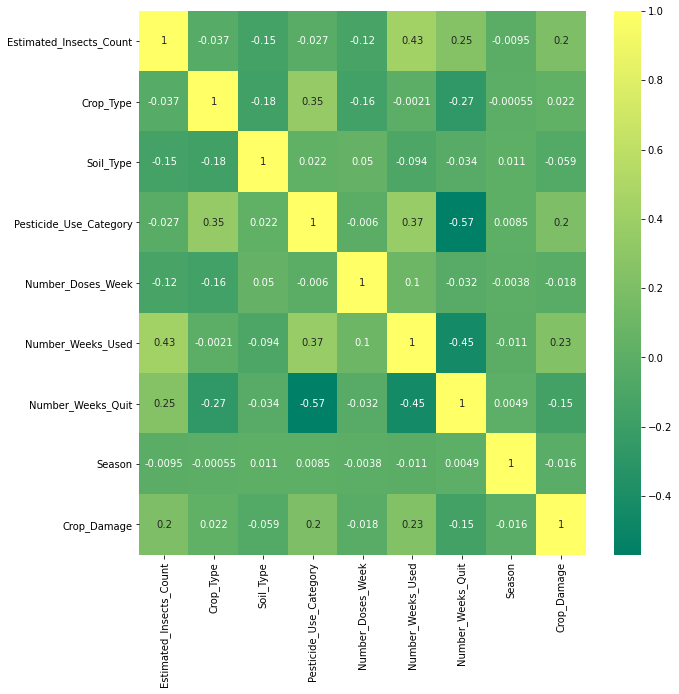

In [14]:
#visualizing the correlation using heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='summer')

There is a high negative correlation among Pesticide_Use_Category and Number_Weeks_Quit and among Number_Weeks_Quit and Number_Weeks_Used.

Visualization of columns:

0    3565
1    1034
Name: Crop_Type, dtype: int64


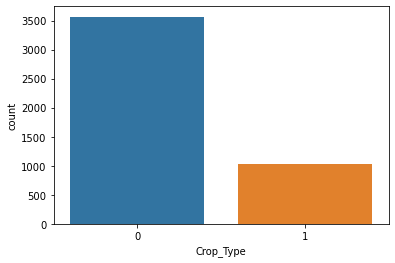

In [15]:
sns.countplot(data['Crop_Type'])
print(data['Crop_Type'].value_counts()) 

We have 3565 crop type 1 and only 1034 of crop type 2.

0    2407
1    2192
Name: Soil_Type, dtype: int64


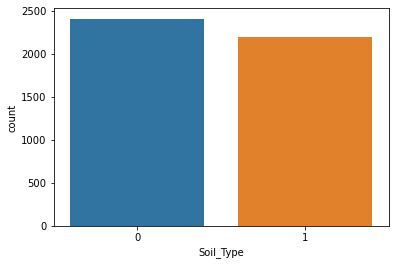

In [16]:
sns.countplot(data['Soil_Type'])
print(data['Soil_Type'].value_counts())

We have 2407 entries of soil type 1 and 2192 entries of soil type 2.

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


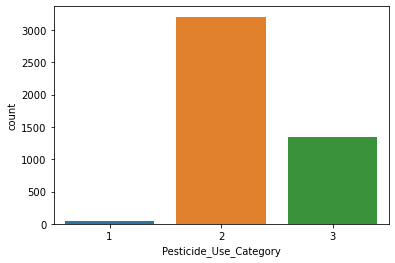

In [17]:
sns.countplot(data['Pesticide_Use_Category'])
print(data['Pesticide_Use_Category'].value_counts())

1. 45 entries of crops are there on which pesticides are never used.
2. 3205 counts of crops are those on which pesticides were previously used..
3. 1349 are the entries on which pesticides are currently being used.

2    2327
1    1379
3     893
Name: Season, dtype: int64


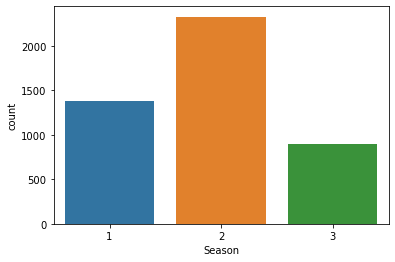

In [18]:
sns.countplot(data['Season'])
print(data['Season'].value_counts())

1. Count of season 2 is the highest, we can say that crop sown in this season are more in the dataset.

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


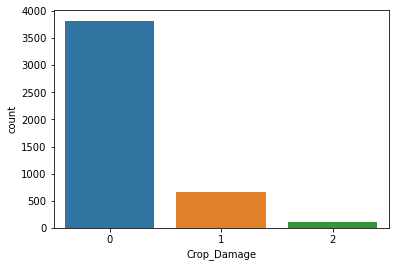

In [19]:
sns.countplot(data['Crop_Damage'])
print(data['Crop_Damage'].value_counts())

1. Category 0 holds a count of 3820 i.e. Most of the crops are categorized as alive. 
2. Category 1 is 664 in number i.e. 664 crops damaged due to some other reasons.
3. Category 3 is 115 in number i.e. 134 plants damaged due to pesticides.

Bivariate analysis:

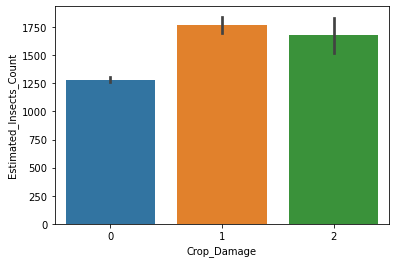

In [20]:
sns.barplot(x='Crop_Damage',y='Estimated_Insects_Count',data=data)

As we know that Crop_Damage category of 1 is the death of crop due to some other reason and insect count is higher in category 1 so insects could be a reason for the crop damage. In alive plants i.e. 0 insects count is lowest.  

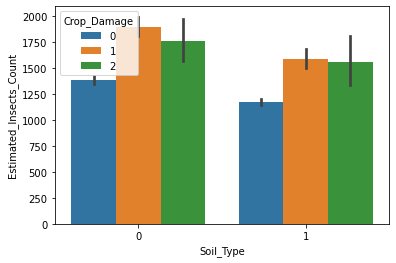

In [21]:
sns.barplot(x='Soil_Type',y='Estimated_Insects_Count',hue='Crop_Damage',data=data)

For soil type 0 we can see a higher count of insects. Also it may be a possibility that in soil type 0 the crop daamge is higher than in soil type 1. 

In [22]:
cross=pd.crosstab(data['Soil_Type'],data['Crop_Damage'])
cross

Crop_Damage,0,1,2
Soil_Type,,,
0,1947,390,70
1,1873,274,45


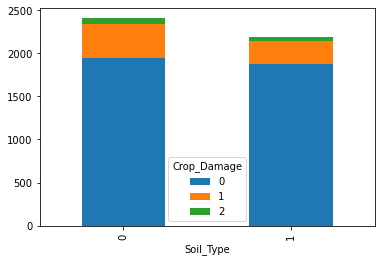

In [23]:
cross.plot(kind='bar',stacked=True)

In soil type 0 we see that crop damage due to some other reasons and also crop damage due to pesticides is higher than in soil type 1.

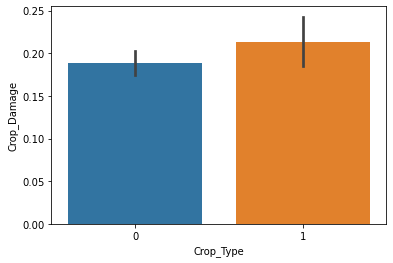

In [24]:
sns.barplot(x='Crop_Type',y='Crop_Damage',data=data)

In above plot, Crop type 1 is more prone to damage we can say.

In [25]:
cross1=pd.crosstab(data['Pesticide_Use_Category'],data['Crop_Damage'])
cross1

Crop_Damage,0,1,2
Pesticide_Use_Category,,,
1,7,33,5
2,2881,290,34
3,932,341,76


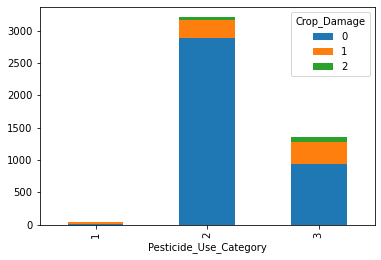

In [26]:
cross1.plot(kind='bar',stacked=True)

As the count for Pesticide_Use_Category were the highest we can see some similar pattern here in the plot above. There is highest crop damage(by some other reasons)  on the crops on which fertilizers are currently used. 

In [27]:
cross2=pd.crosstab(data['Season'],data['Crop_Damage'])
cross2

Crop_Damage,0,1,2
Season,,,
1,1150,192,37
2,1908,358,61
3,762,114,17


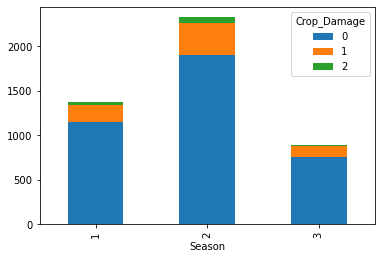

In [28]:
cross2.plot(kind='bar',stacked=True)

 Season 2 has the highest entries in the data thats why we have most of the plants alive in season 2. Also count for crops damage is high in season 2.

In [29]:
cross3=pd.crosstab(data['Soil_Type'],data['Crop_Type'])
cross3

Crop_Type,0,1
Soil_Type,,
0,1698,709
1,1867,325


0    3565
1    1034
Name: Crop_Type, dtype: int64
0    2407
1    2192
Name: Soil_Type, dtype: int64


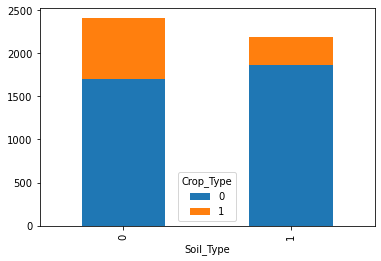

In [30]:
print(data['Crop_Type'].value_counts())
print(data['Soil_Type'].value_counts())
cross3.plot(kind='bar',stacked=True)

It may be inferred that soil type 1 is favourable to crop type 0 and soil type 0 is favourable to crop type 1.

In [31]:
cross4=pd.crosstab(data['Pesticide_Use_Category'],data['Crop_Type'])
cross4

Crop_Type,0,1
Pesticide_Use_Category,,
1,21,24
2,2829,376
3,715,634


0    3565
1    1034
Name: Crop_Type, dtype: int64
2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


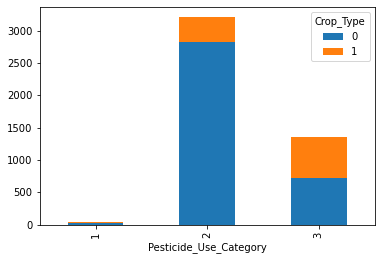

In [32]:
print(data['Crop_Type'].value_counts())
print(data['Pesticide_Use_Category'].value_counts())
cross4.plot(kind='bar',stacked=True)

For crop type 1 we can see that higher number of crops are currently being spread with pesticides.

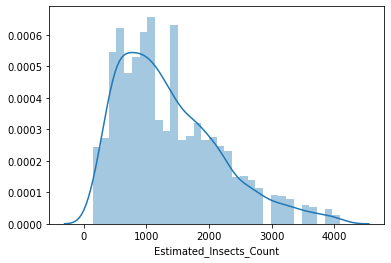

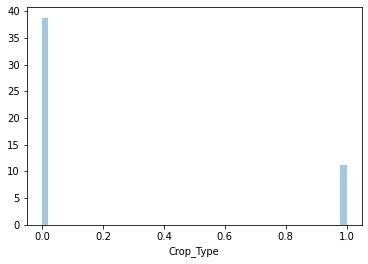

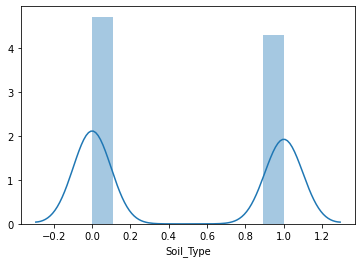

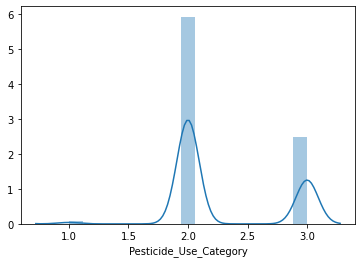

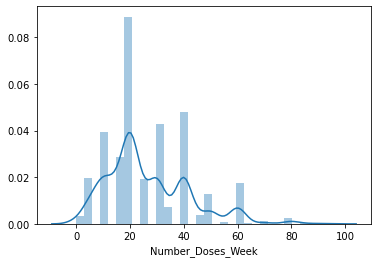

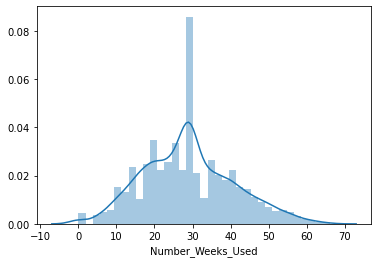

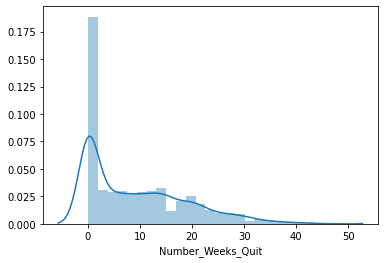

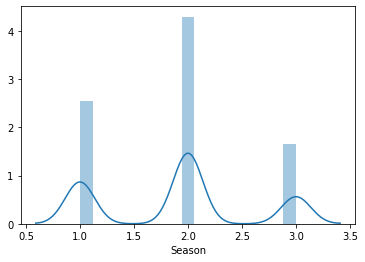

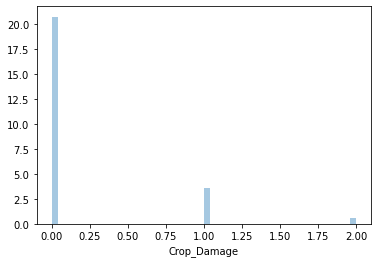

In [33]:
for i in data.describe():
    sns.distplot(data[i])
    plt.show()

With the help of distplot we can see the distribution of the data:
    1. Estimated_Insects_Count is right skewed.
    2. Crop_Type is a categorical data with entries as 0 and 1.
    3. Soil_Type is also a categorical data with two entries 0 and 1.
    4. Pesticide_Use_Category is a categorical data with 3 entries 1,2 and 3 with minimum entries for category 1.
    5. Number_Doses_Week is a right skewed data.
    6. Number_Weeks_Used is a bell shaped curve having normal distribution.
    7. Number_Weeks_Quit is a right skewed data.
    8. Season is a categorical data with three entires 1,2 and 3.
    9. Crop_Damage is a categorical data with three entries 0,1 and 2 having highest entries for category 0.

In [34]:
#checking the skewness of the data
data.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [35]:
#Lets drop the column ID before removing skewness as the column have unique entries for all the rows.
data['ID'].value_counts()

F00006009    1
F00005599    1
F00000196    1
F00002837    1
F00004954    1
            ..
F00002221    1
F00006576    1
F00000530    1
F00004842    1
F00001177    1
Name: ID, Length: 4599, dtype: int64

In [36]:
data.drop(['ID'],axis=1,inplace=True)
data

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


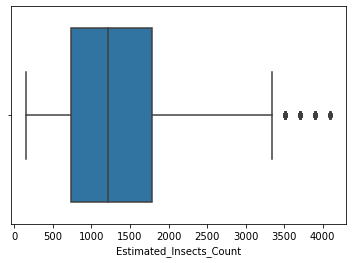

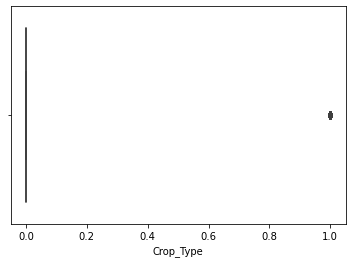

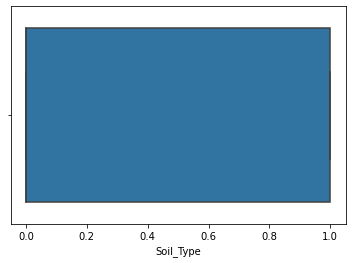

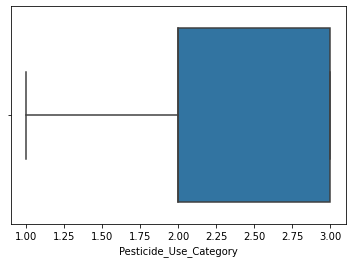

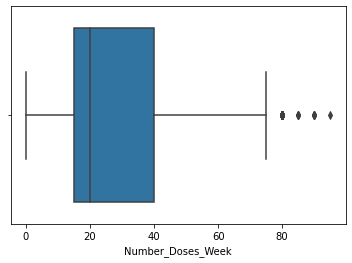

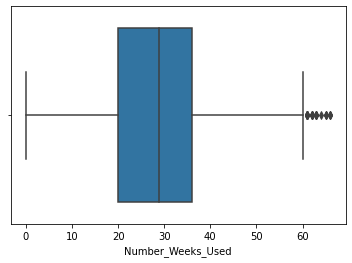

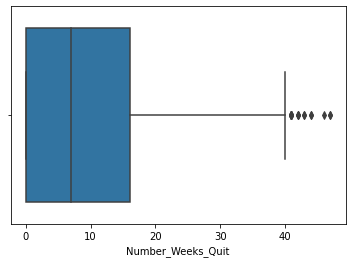

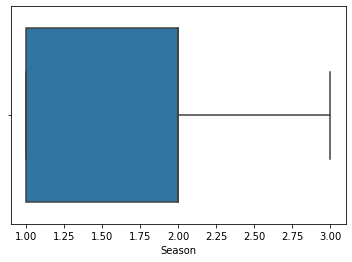

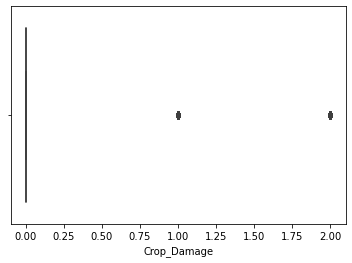

In [37]:
#Checking for outliers
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

Here the columns: Estimated_Insects_Count, Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit have outliers. We will remove the outliers using zscore.

In [38]:
#Removing skewness using power transfrom for the variables which are  not categorical.
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [39]:
list=['Estimated_Insects_Count','Number_Weeks_Used','Number_Doses_Week','Number_Weeks_Quit']
for i in list:
    if data.skew().loc[i]>0.55:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))
    else:
        data[i]=data[i]

In [40]:
data.skew()

Estimated_Insects_Count   -0.032846
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.008110
Number_Weeks_Used          0.278664
Number_Weeks_Quit         -0.089868
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [41]:
#Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(data))

In [42]:
data_new=data[(z<3).all(axis=1)]
data_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,-2.244762,1,0,1,-2.936955,0.000000,-1.240226,1,0
1,-2.146827,1,0,1,-2.936955,0.000000,-1.240226,2,1
2,-1.946443,1,0,1,-2.936955,0.000000,-1.240226,2,1
3,-1.946443,1,1,1,-2.936955,0.000000,-1.240226,2,1
4,-1.648325,1,0,1,-2.936955,0.000000,-1.240226,2,1
...,...,...,...,...,...,...,...,...,...
4594,1.003197,0,1,2,-0.279016,28.891027,-0.788394,1,1
4595,1.004073,0,1,2,0.381917,47.000000,-0.504125,1,1
4596,1.114021,0,1,2,-1.160435,7.000000,1.368852,2,0
4597,1.114021,0,1,2,-1.160435,20.000000,1.259832,2,0


In [43]:
print('Shape before removing outliers: ',data.shape,'\t shape after removing outliers: ',data_new.shape)

Shape before removing outliers:  (4599, 9) 	 shape after removing outliers:  (4477, 9)


In [44]:
data_new.skew()

Estimated_Insects_Count   -0.031759
Crop_Type                  1.319581
Soil_Type                  0.085431
Pesticide_Use_Category     0.745166
Number_Doses_Week          0.025111
Number_Weeks_Used          0.269942
Number_Weeks_Quit         -0.120820
Season                     0.142374
Crop_Damage                1.987193
dtype: float64

In [45]:
#Splitting the data into x_train and y_train
x_train=data_new.drop(['Crop_Damage'],axis=1)
y_train=data_new['Crop_Damage']

In [46]:
x_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.244762,1,0,1,-2.936955,0.000000,-1.240226,1
1,-2.146827,1,0,1,-2.936955,0.000000,-1.240226,2
2,-1.946443,1,0,1,-2.936955,0.000000,-1.240226,2
3,-1.946443,1,1,1,-2.936955,0.000000,-1.240226,2
4,-1.648325,1,0,1,-2.936955,0.000000,-1.240226,2
...,...,...,...,...,...,...,...,...
4594,1.003197,0,1,2,-0.279016,28.891027,-0.788394,1
4595,1.004073,0,1,2,0.381917,47.000000,-0.504125,1
4596,1.114021,0,1,2,-1.160435,7.000000,1.368852,2
4597,1.114021,0,1,2,-1.160435,20.000000,1.259832,2


In [47]:
y_train

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4477, dtype: int64

In [48]:
#Now for x_test we need to import the test data of agriculture dataset and we will remove the skewness and outliers and proceed ahead.
test=pd.read_excel('test_agriculture.xlsx')
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [49]:
#Dropping the ID column here too
test.drop(['ID'],axis=1,inplace=True)
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


In [50]:
#here we can see NaN values in Number_Weeks_Used
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

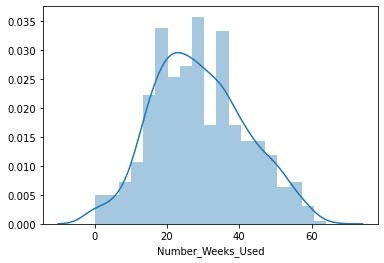

In [51]:
#Removing null values
sns.distplot(test['Number_Weeks_Used'])

In [52]:
#Number_Weeks_Used is a normally distributed data we will use mean to replace the null values.
imp=SimpleImputer(strategy='mean')
test['Number_Weeks_Used']=imp.fit_transform(test['Number_Weeks_Used'].values.reshape(-1,1))

In [53]:
test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [54]:
#Checking for skewness
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

Here Number_Doses_Week and Number_Weeks_Quit are the non-categorical data with skewness, we will remove ther skewness using Power Transformer

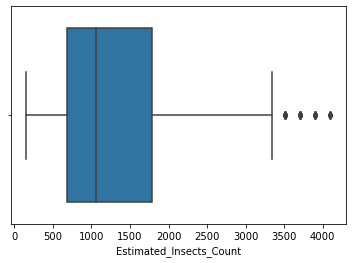

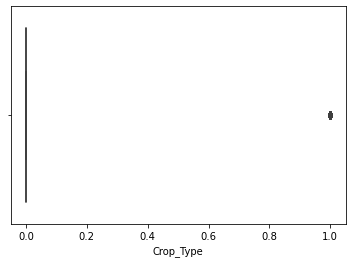

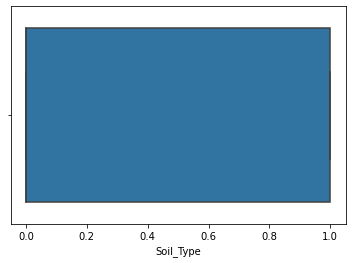

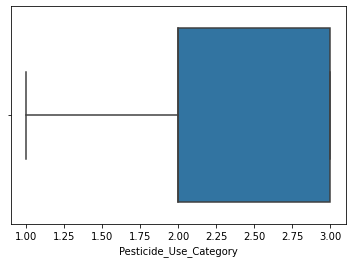

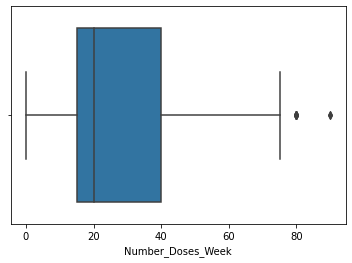

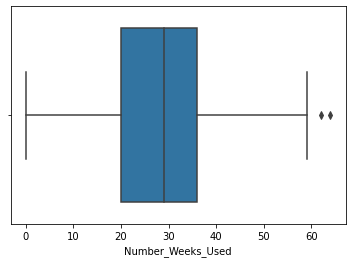

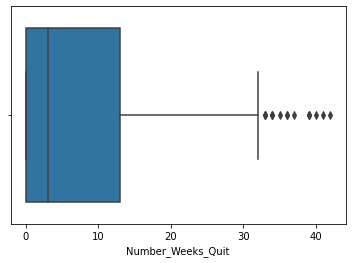

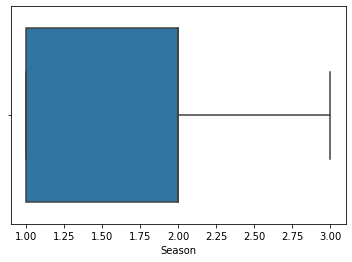

In [55]:
#Checking for outliers
for i in test.columns:
    sns.boxplot(test[i])
    plt.show()

Observations:
    1. Columns: Estimated_Insects_Count, Number_Doses_week, Number_Weeks_Used, Number_Weeks_Quit have outliers present . We will remove the outliers using zscore.

In [56]:
#Removing skewness using PowerTransformer
tuple=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit']
for i in tuple:
    test[i]=pt.fit_transform(test[i].values.reshape(-1,1))

In [57]:
test.skew()

Estimated_Insects_Count   -0.016231
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.006111
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.115384
Season                     0.155872
dtype: float64

In [58]:
#Removing outliers
z1=np.abs(zscore(test))
z1

array([[2.25611284e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 1.03063387e+00, 1.72804130e-01],
       [1.32439628e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 1.03063387e+00, 1.72804130e-01],
       [7.68063353e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 1.03063387e+00, 1.72804130e-01],
       ...,
       [7.60585503e-02, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.34448774e+00, 1.28629553e+00],
       [1.78537072e-01, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 4.46391027e-01, 1.28629553e+00],
       [1.78537072e-01, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.26592298e+00, 1.63190379e+00]])

In [59]:
#threshold=3
test_new=test[(z1<3).all(axis=1)]
test_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.256113,1,1,1,-2.642157,29.033333,-1.030634,2
1,-1.324396,1,1,1,-2.642157,0.000000,-1.030634,2
2,-0.768063,1,0,1,-2.642157,0.000000,-1.030634,2
3,-0.554689,1,0,1,-2.642157,0.000000,-1.030634,2
4,-0.447685,0,0,1,-2.642157,0.000000,-1.030634,1
...,...,...,...,...,...,...,...,...
1194,0.076059,0,1,2,0.890910,34.000000,0.648513,3
1195,0.076059,0,1,2,0.890910,25.000000,0.146202,1
1196,0.076059,0,1,2,-0.264468,13.000000,1.344488,1
1197,0.178537,0,1,2,-1.083697,35.000000,0.446391,1


In [61]:
print('Shape before removing outliers: ',test.shape,'\tshape after removing outliers: ',test_new.shape)

Shape before removing outliers:  (1199, 8) 	shape after removing outliers:  (1199, 8)


In [63]:
#Using Min-Max Scaler on x_train and x_test
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

In [66]:
train=mns.fit_transform(x_train)
x_train=pd.DataFrame(train,columns=x_train.columns)
x_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.041476,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.061914,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.5
2,0.103733,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.5
3,0.103733,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.5
4,0.165948,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.5
...,...,...,...,...,...,...,...,...
4472,0.719303,0.0,1.0,0.5,0.455355,0.451422,0.143408,0.0
4473,0.719486,0.0,1.0,0.5,0.568585,0.734375,0.233633,0.0
4474,0.742431,0.0,1.0,0.5,0.304351,0.109375,0.828101,0.5
4475,0.742431,0.0,1.0,0.5,0.304351,0.312500,0.793499,0.5


In [68]:
#x_test after saling the data using Min Max Scaler
scale_test=mns.fit_transform(test_new)
x_test=pd.DataFrame(scale_test,columns=test_new.columns)
x_test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.052814,1.0,1.0,0.0,0.000000,0.453646,0.000000,0.5
1,0.250663,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.5
2,0.368799,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.5
3,0.414109,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.5
4,0.436831,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
1194,0.548047,0.0,1.0,0.5,0.644685,0.531250,0.621845,1.0
1195,0.548047,0.0,1.0,0.5,0.644685,0.390625,0.435822,0.0
1196,0.548047,0.0,1.0,0.5,0.433861,0.203125,0.879588,0.0
1197,0.569808,0.0,1.0,0.5,0.284375,0.546875,0.546992,0.0


In [69]:
x_train.shape

(4477, 8)

In [72]:
x_train.skew()

Estimated_Insects_Count   -0.031759
Crop_Type                  1.319581
Soil_Type                  0.085431
Pesticide_Use_Category     0.745166
Number_Doses_Week          0.025111
Number_Weeks_Used          0.269942
Number_Weeks_Quit         -0.120820
Season                     0.142374
dtype: float64

In [70]:
y_train.shape

(4477,)

In [71]:
x_test.shape

(1199, 8)

In [73]:
x_test.skew()

Estimated_Insects_Count   -0.016231
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.006111
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.115384
Season                     0.155872
dtype: float64

In [74]:
#Modelling the data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
list=[MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for j in list:
    print('For the algorithm: ',j)
    j.fit(x_train,y_train)
    pred=j.predict(x_test)
    print('Score is ',j.score(x_train,y_train))
    print("************************************************************************")  

For the algorithm:  MultinomialNB()
Score is  0.852356488720125
************************************************************************
For the algorithm:  SVC()
Score is  0.8586106767924949
************************************************************************
For the algorithm:  DecisionTreeClassifier()
Score is  0.9986598168416351
************************************************************************
For the algorithm:  KNeighborsClassifier()
Score is  0.8740227831136922
************************************************************************


In [77]:
# Using ensemble techniques to boost up our score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
list=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for m in list:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Score of',m,"is:",score)

Score of RandomForestClassifier() is: 0.9986598168416351
Score of AdaBoostClassifier() is: 0.8574938574938575
Score of GradientBoostingClassifier() is: 0.8702255974983247
Score of BaggingClassifier() is: 0.9778869778869779


We can observe that random forest and Decision tree classfier both are performing above 0.99. We will proceed ahead with random forest classifier as it doesnt over fit the data easily. So our model is not biased.

In [79]:
#Searching for the best parameters for Random Forest Classifier
#GridSearchCV
from sklearn.model_selection import GridSearchCV
rnc=RandomForestClassifier()
parameters={ 'random_state': range(33,55),
           'criterion':['gini','entropy']
           }
cv=GridSearchCV(rnc,parameters)
cv.fit(x_train,y_train)
print(cv.best_params_)

{'criterion': 'gini', 'random_state': 44}


In [80]:
#Working with the best paramteres
rnc=RandomForestClassifier(random_state=44,criterion='gini')
rnc.fit(x_train,y_train)
print('Score:',rnc.score(x_train,y_train))
print('Result of prediction:',rnc.predict(x_test))

Score: 0.9986598168416351
Result of prediction: [1 1 1 ... 0 0 0]


In [83]:
#Applying cross val score to check the under fitting and over fitting of the data
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rnc,x_train,y_train,cv=5)
print('The cross validation score is: ',cv)
print('The mean and standard deviations are: ',cv.mean(),cv.std())

The cross validation score is:  [0.82142857 0.84040179 0.84804469 0.83463687 0.84469274]
The mean and standard deviations are:  0.8378409317637671 0.009351508175113921


In [84]:
#Saving the best model Random Forest Classifier with best parameters.
import joblib
joblib.dump(rnc,'agricluture.pkl')

['agricluture.pkl']